In [1]:
from math import e, factorial,log, gamma, sqrt, floor
from matplotlib import pyplot as pt
from numpy.random import geometric,exponential,poisson
from scipy.stats import ks_2samp
from scipy.stats import norm
from numpy import linspace
from IPython.display import Markdown
from analysis import *

In [2]:
def genWindowHistogram(r1,r2,wnd,Eb):
    windows = []
    for i in range(0,len(r1),wnd):
        count = 0
        for j in range(i,i+wnd):
            try:
                if r1[j]=='S' and r2[j]=='B':
                    count += 1
            except:
                pass
        windows.append(count)
     
    result = [0 for i in range(wnd)]
    for n in range(len(result)):
        result[n] = windows.count(n)/len(windows)
    #print(sum(result))
    return result

def check_Poisson(hist,rt):
    rvd = poisson_dist(rt,len(hist))
    print("RMSE Poisson= %.6f"%rmse(rvd,hist)) 

Ttx = 15
Trx = 60
Tn = 100
    
pt.rcParams["figure.figsize"] = (20,10)

## Networking disabled

Success probability evts: 0.099905
-----------------------------------------------------------
rt1 = 0.060021
-----------------------------------------------------------
Success probability evts: 0.200273
-----------------------------------------------------------
rt1 = 0.053339
-----------------------------------------------------------
Success probability evts: 0.299954
-----------------------------------------------------------
rt1 = 0.046661
-----------------------------------------------------------
Success probability evts: 0.399918
-----------------------------------------------------------
rt1 = 0.039978
-----------------------------------------------------------
Success probability evts: 0.499982
-----------------------------------------------------------
rt1 = 0.033334
-----------------------------------------------------------
Success probability evts: 0.599682
-----------------------------------------------------------
rt1 = 0.026653
----------------------------------------

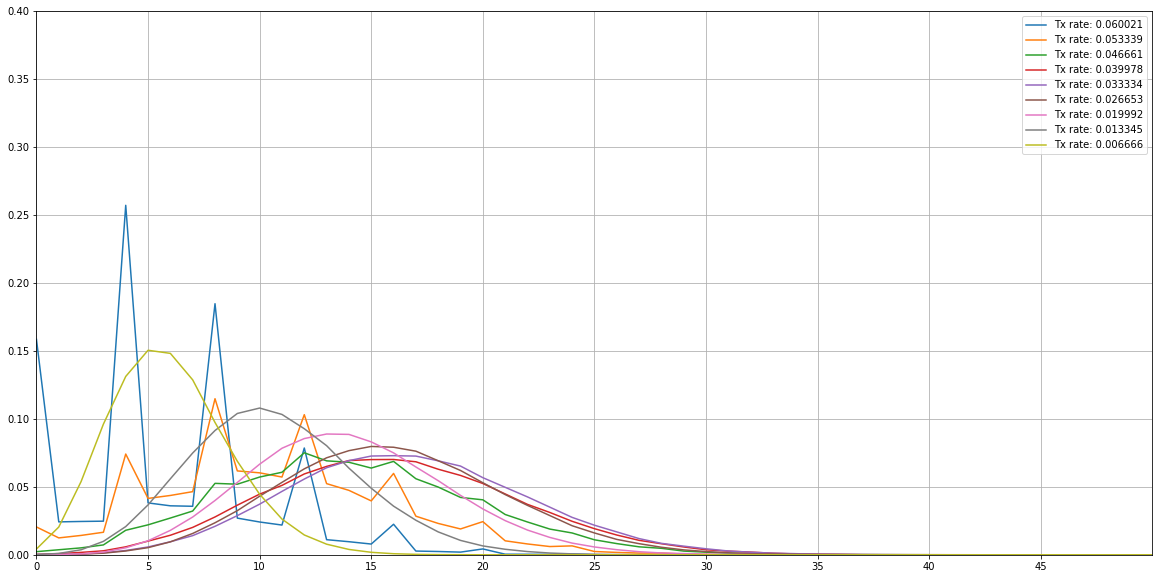

In [3]:
for i in range(1,10):
    f1 = open("r%d-d0-result.txt"%i)
    raw1 = f1.read()
    f1.close()

    f2 = open("r%d-d1-result.txt"%i)
    raw2 = f2.read()
    f2.close()
    
    Eb1,Es1,En1 = computeEvents(raw1,Ttx,Trx,Tn)
    Eb2,Es2,En2 = computeEvents(raw2,Ttx,Trx,Tn)
    
    wnds1 = genWindowHistogram(raw1,raw2,1000,Eb2)
    
    print("Success probability evts: %.6f"%(checkSuccess(raw2,raw1)[0]/Eb2))
    print('-----------------------------------------------------------')
    
    rt1 = Eb2/len(raw2)
    
    print("rt1 = %.6f"%(rt1))
    print('-----------------------------------------------------------')
    
    pt.plot(range(len(wnds1)),wnds1,label="Tx rate: %.6f"%rt1)


pt.legend()
pt.axis([0,len(wnds1)//20,0,0.4])
pt.xticks(range(0,len(wnds1)//20,5), [str(n) for n in range(0,len(wnds1)//20,5)])
pt.grid(True)
pt.savefig('success_distribution_BS.pdf',dpi=300, bbox_inches='tight')
pt.show()

## Networking enabled

Success probability evts: 0.100151
-----------------------------------------------------------
rt2 = 0.056670
-----------------------------------------------------------
Success probability evts: 0.200127
-----------------------------------------------------------
rt2 = 0.050003
-----------------------------------------------------------
Success probability evts: 0.299997
-----------------------------------------------------------
rt2 = 0.043348
-----------------------------------------------------------
Success probability evts: 0.399594
-----------------------------------------------------------
rt2 = 0.036658
-----------------------------------------------------------
Success probability evts: 0.500106
-----------------------------------------------------------
rt2 = 0.029987
-----------------------------------------------------------
Success probability evts: 0.548981
-----------------------------------------------------------
rt2 = 0.026668
----------------------------------------

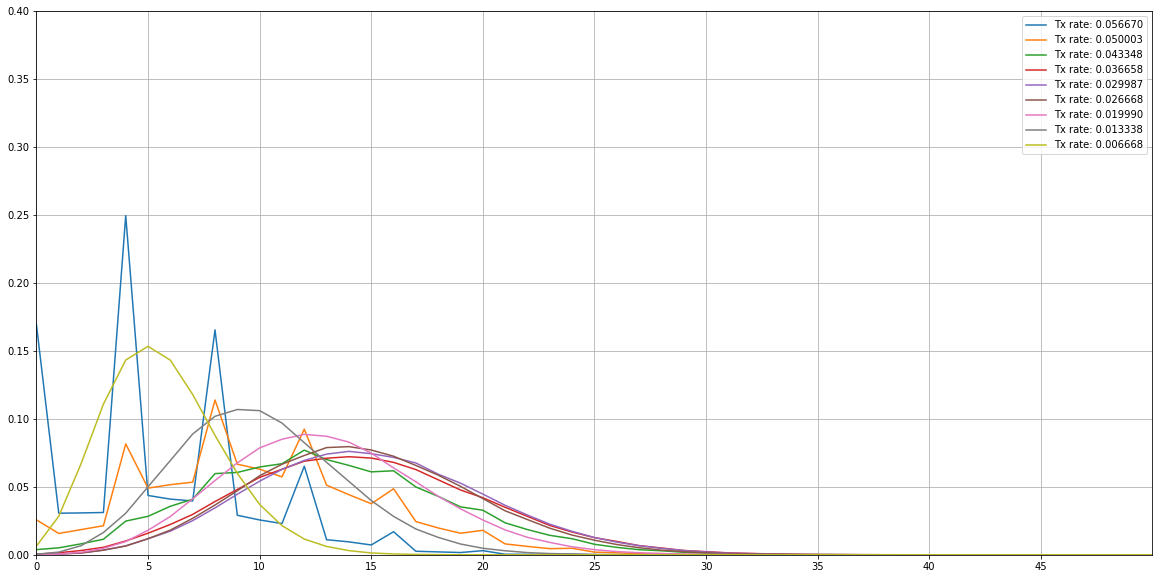

In [4]:
for i in range(1,10):
    
    f3 = open("r2%d-d0-result.txt"%i)
    raw3 = f3.read()
    f3.close()

    f4 = open("r2%d-d1-result.txt"%i)
    raw4 = f4.read()
    f4.close()
    
    Eb3,Es3,En3 = computeEvents(raw3,Ttx,Trx,Tn)
    Eb4,Es4,En4 = computeEvents(raw4,Ttx,Trx,Tn)
    wnds2 = genWindowHistogram(raw3,raw4,1000,Eb4)
    print("Success probability evts: %.6f"%(checkSuccess(raw4,raw3)[0]/Eb4))
    print('-----------------------------------------------------------')
    rt2 = Eb4/len(raw4)
    print("rt2 = %.6f"%(rt2))
    print('-----------------------------------------------------------')
    pt.plot(range(len(wnds2)),wnds2,label="Tx rate: %.6f"%rt2)

    
pt.legend()
pt.axis([0,len(wnds2)//20,0,0.4])
pt.xticks(range(0,len(wnds2)//20,5), [str(n) for n in range(0,len(wnds2)//20,5)])
pt.grid(True)
pt.savefig('success_distribution_BSN.pdf',dpi=300, bbox_inches='tight')
pt.show()